In [2]:
# 全域⽊（spanning tree）グラフにおいて，すべての頂点がつながっている⽊（閉路を持たない連結グラフ）
# 最⼩全域⽊（minimum spanning tree）全域⽊の中で辺の距離（コスト）の総和が最⼩になるもの

# 各ノードからの行き先、距離
edges = [[[1, 5], [2, 4]], #ノードA0
[[0, 5], [3, 3], [5, 9]], #ノードB1
[[0, 4], [3, 2], [4, 3]], #ノードC2
[[1, 3], [2, 2], [6, 7], [7, 5]], #ノードD3
[[2, 3], [6, 8]], #ノードE4
[[1, 9]], #ノードF5
[[3, 7], [4, 8], [7, 1]], #ノードG6
[[3, 5], [6, 1]]] #ノードH7

N=len(edges)
edges2 = [] # from,to,distance
for i in range(len(edges)):
    for node in edges[i]:
        edges2.append([i,node[0],node[1]])

# 辺ベースのアプローチ：クラスカル法
# 存在する辺を距離の短い順に並べて順に⼊れていき，閉路が出来ないことが確認できた場合は追加し，全部の辺をチェックしたら終了．
# 隣接リストの場合，辺の数をEとして，辺のソートにE log Eかかる
# 各辺を⼊れるかどうかの判断はUnion-Find⽊を使うとα(V)となり，これをE回やるので，E α(V)
# よって，アルゴリズム全体ではO(E log E)

class UnionFind: #UF木の実装
    def __init__(self, n):
        self.parent = [i for i in range(n)]
        self.height = [0 for i in range(n)] # 各⽊の⾼さ

    def get_root(self, i):
        if self.parent[i] == i: # ⾃分が根ノードの場合
            return i
        else: # 経路圧縮しながら根ノードを探す
            self.parent[i] = self.get_root(self.parent[i])
            return self.parent[i]
    
    def unite(self, i, j):
        ri = self.get_root(i)
        rj = self.get_root(j)
        if ri != rj: # より⾼い⽅にマージ
            if self.height[ri] < self.height[rj]:
                self.parent[ri] = rj
            else:
                self.parent[rj] = ri
                if self.height[ri] == self.height[rj]:
                    self.height[ri] += 1
    
    def is_in_group(self, i, j):
        if self.get_root(i) == self.get_root(j):
            return True
        else:
            return False

def Kruskal(V, edges): #クラスカル法の実装
    e_sorted = [] # 距離で整列された辺
    for e in edges:
        e_sorted.append([e[2], e[0], e[1]]) # ソートのために先頭の要素を距離にする
    e_sorted.sort()
    uf_tree = UnionFind(V) # Union-Find⽊を使う
    mst = [] # 最⼩全域⽊の辺を保持するリスト
    min_d = 0
    for e in e_sorted:
        if uf_tree.is_in_group(e[1], e[2]) == False:
            uf_tree.unite(e[1], e[2]) # e[1]，e[2]を同じグループにする
            mst.append([e[1], e[2]]) # 最⼩全域⽊に追加
            min_d += e[0]

    #print(min_d)
    print(mst)
    
Kruskal(N, edges2)

[[6, 7], [2, 3], [1, 3], [2, 4], [0, 2], [3, 7], [1, 5]]


In [3]:
# ノードベースのアプローチ：プリム法
# すでに到達した頂点の集合からまだ到達していない頂点の集合への辺のうち，距離が最短のものを追加し，全ノードつながったら終了
# この実装では，ヒープに⼊る要素の数は辺の総数になるので，E．よって，追加，削除にかかる計算量はlog E．
# ヒープへの追加も取り出しもE回あるので，全体ではO(E log E)となる
import heapq

def Prim(V, edges): #プリム法の実装
    edges2 = [[] for i in range(V)] # ノードiからのすべての辺を格納
    for e in edges:
        edges2[e[0]].append([e[2], e[0], e[1]]) # ヒープでソートされるために距離を最初の要素にする
    heap = [] # ヒープ
    mst = [] # 最⼩全域⽊の辺を保持するリスト
    done = [False]*V # ノードが最⼩全域⽊に⼊ったかどうかのフラグ
    start=0
    done[start] = True # ノードを1つ選ぶ．何でも良いがこの実装ではノード0を選ぶことにする
    for i in range(len(edges2[start])): # ノード0に接続する辺を全てヒープに⼊れる
        heapq.heappush(heap,edges2[start][i])
    min_d = 0
    while heap:
        e = heapq.heappop(heap) # 距離が最短のものを取り出す
        if done[e[2]] == False: # その辺の到達先（ノードj）が未訪問なら追加
            done[e[2]] = True
            mst.append([e[1], e[2]])
            for i in range(len(edges2[e[2]])): #ノードjから伸びる辺をe_heapqに⼊れる
                heapq.heappush(heap,edges2[e[2]][i])
            min_d += e[0]

    #print(min_d)
    print(mst)

Prim(N,edges2)

[[0, 2], [2, 3], [2, 4], [3, 1], [3, 7], [7, 6], [1, 5]]


In [4]:
def Fibonacci(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return Fibonacci(n-1) + Fibonacci(n-2)

Fibonacci(40)

KeyboardInterrupt: 

In [ ]:
def Fibonacci2(n):
    A = [0] * (n+1)
    for i in range(n+1):
        if i == 0: A[i] = 0
        elif i == 1: A[i] = 1
        else:  A[i] = A[i-1] + A[i-2]
    
    return A[n]

Fibonacci2(40)

102334155

In [ ]:
import numpy 
def self_pow(x,n):
    ans = 1
    while n:
        if n % 2:
            ans *= x
        x *= x
        n >>= 1
    return ans

def Fibonacci3(n):
    sqrt = numpy.sqrt(5)
    f = (1/sqrt)*(self_pow((1+sqrt)/2,n) - self_pow((1-sqrt)/2,n))
    return round(f)

Fibonacci3(40)

102334155

In [ ]:
def binary_search(A,x):
    l = len(A)
    A.sort()
    mi = A[0]
    ma = A[l-1]
    
    if x < mi or x > ma:
        print("No")
    else:
        low=0
        high=l-1
        f=0
        while low<=high:
            mid=(low+high)//2
            if x==A[mid]:
                f=1
                break
            if x>A[mid]:
                low=mid+1
            else:
                high=mid-1
        if f==1:
            print("Yes")
        else:
            print("No")

A = [1,2,4,3,5,2,6,8,2,4,9]
x = 3 #サーチ対象

binary_search(A,x)

[1, 2, 2, 2, 3, 4, 4, 5, 6, 8, 9]
Yes


In [ ]:
# リングバッファでの実装

class Queue:
    def __init__(self,size: int):
        self.queue = [None for i in range(size)]
        self.size = size
        self.head = 0
        self.tail = 0

    def enqueue(self,a: int):
        if self.head == (self.tail+1)%self.size:
            print("full")
            return False
        self.queue[self.tail] = a
        self.tail = (self.tail+1)%self.size

    def dequeue(self):
        if self.head == self.tail:
            print("empty")
            return False
        a = self.queue[self.head]
        self.head = (self.head+1)%self.size
        return a

Q = 3
q=Queue(Q)
q.enqueue(1)
q.enqueue(2)
q.dequeue()

# Algo 2-1
lines=[0 for i in range(4)]
lines[0]='3'
lines[1]='1 1000000000'
lines[2]='1 1000000000'
lines[3]='2'
Q=int(lines[0])
for i in range(Q):
    l=[int(x.strip()) for x in lines[i+1].split()]
    if l[0]==1:
        q.enqueue(l[1])
    else:
        print(q.dequeue())

1

In [ ]:
# 最大ヒープ
class maxHeap:
    def __init__(self):
        self.list=[]

    def heappush(self,a: int):
        self.list.append(a)
        index = len(self.list) - 1
        while 1:
            parent = (index-1) // 2
            if index == 0:
                break
            if self.list[index] > self.list[parent]:
                self.list[index],self.list[parent] = self.list[parent],self.list[index]
                index = parent
            else: 
                break         

    def heappop(self):
        a = self.list[0]
        self.list[0] = self.list.pop()
        parent = 0        
        while 1:
            c1 = 2*parent + 1
            c2 = 2*parent + 2
            if c2 >= len(self.list):
                c = c1
            else:
                if self.list[c1] < self.list[c2]:
                    c = c2
                else:
                    c = c1
            if c >= len(self.list):
                break
                
            if self.list[c] > self.list[parent]:
                self.list[c],self.list[parent] = self.list[parent],self.list[c]
                parent = c
            else:
                break
        return a


heap2 = maxHeap()
heap2.heappush(5)
heap2.heappush(3)
heap2.heappush(4)
heap2.heappop()

5

In [ ]:
# Algo 2-2
lines=[0 for i in range(6)]
lines[0]='5'
lines[1]='1 5'
lines[2]='1 3'
lines[3]='2'
lines[4]='1 4'
lines[5]='2'
Q=int(lines[0])
heap3=maxHeap()
for i in range(Q):
    l=[int(x.strip()) for x in lines[i+1].split()]
    if l[0]==1:
        heap3.heappush(l[1])
    else:
        print(heap3.heappop())

5
4


In [ ]:
# 配列を用いたヒープの実装 iに対して親(i-1)//2,左の子2i+1, 右の子2i+2となる
# 最小ヒープ
class minHeap:
    def __init__(self):
        self.list=[]

    def heappush(self,a: int):
        self.list.append(a)
        index = len(self.list) - 1
        while 1:
            parent = (index-1) // 2
            if index == 0:
                break
            if self.list[index] < self.list[parent]:
                self.list[index],self.list[parent] = self.list[parent],self.list[index]
                index = parent
            else: 
                break         

    def heappop(self):
        a = self.list[0]
        self.list[0] = self.list.pop()
        parent = 0        
        while 1:
            c1 = 2*parent + 1
            c2 = 2*parent + 2
            if c2 >= len(self.list):
                c = c1
            else:
                if self.list[c1] > self.list[c2]:
                    c = c2
                else:
                    c = c1
            if c >= len(self.list):
                break
                
            if self.list[c] < self.list[parent]:
                self.list[c],self.list[parent] = self.list[parent],self.list[c]
                parent = c
            else:
                break
        return a

heap = minHeap()
heap.heappush(5)
heap.heappush(3)
heap.heappush(4)
heap.heappop()

3

In [ ]:
class hash:
    def __init__(self, Nin=10**9 + 7):
        self.N = Nin
        self.table=['']*Nin

    def push(self, x):
        n = x % self.N
        if self.table[n] == '':
            self.table[n] = x
        else:
            self.table.append(x)
    
    def search(self, x):
        n = x % self.N
        if self.table[n] == x:
            print('found')
        elif self.table[n] == '':
            print('not found')
        else:
            N2 = len(self.table)
            if N2 == self.N:
                print('not found')
            else:
                for j in range(self.N, N2):
                    if self.table[j] == x:
                        print('found')
                        break
                    elif j == N2-1:
                        print('not found')

hash1 = hash(10)
hash1.push(1)
hash1.push(11)
hash1.search(11)
hash1.search(2)

found
not found


In [ ]:
# Knuth-Morris-Pratt法 
# 照合が失敗した時点の状況（何⽂字⽬まで照合したか）に応じて，次の照合位置を変更
# テーブルにはどこで照合失敗したらどこから照合し直すかが記載
# 照合対象の⽂字列の⻑さがn，照合パターンの⻑さがl
# スキップテーブルの作成：l．照合：最悪でもn よって，O(n+l)

def kmp(S,T):
    table=[0]*(len(T)+1) # スキップテーブル
    table[0] = -1 # 使わない
    i,j = 0,1 # パターン内の繰り返しを調べる
    while j < len(T): # スキップテーブルを作る
        if T[i] != T[j] and i > 0:
            i = table[i]
        else:
            if T[i] == T[j]:
                i += 1
            j += 1
            table[j] = i

    k = l = 0 # テキストとパターンのカーソル位置
    while k < len(S) and l < len(T): # 照合を⾏うループ
        if S[k] == T[l]: # ⼀致している場合は両⽅のカーソルを進める
            k += 1
            l += 1
        elif l == 0:# 照合パターン1⽂字⽬で失敗した場合は，テキスト側のカーソルを1つすすめるだけ．
            k += 1
        else: # 照合パターン2⽂字⽬以降はスキップテーブルを使ってどこから照合し直すか決定
            l = table[l]

    if l == len(T):
        print(k-l)
    else:
        print(-1)

S = 'asdfdgdfhfdhafdgdhfdhd'
T = 'fdgd'
kmp(S,T)


3


In [ ]:
#Rabin-Karp法
# 部分⽂字列をハッシュに変換しておき，⽂字列の照合をハッシュ値の⼀致の問題へと変換
# 照合パターンのハッシュ化： O(l) ハッシュを⽤いての照合：⼀番最初だけはO(l)，あとはO(1) ．最悪の場合はn-l回の⽐較が必要．よって，O(n)
# よって，O(n+l)
def RollingHashMatch(S,T):
    a = 1007 # 基数
    h = 10**9+7 # 除数
    Slen = len(S)
    Tlen = len(T)
    Shash = 0 # 照合対象側のハッシュ
    Thash = 0 # 照合パターン側のハッシュ
    num = lambda c : ord(c)-ord('a') # アルファベットを整数に変換
    am = 1
    for i in range(Tlen):
        Shash += num(S[Tlen-i-1])*am
        Thash += num(T[Tlen-i-1])*am
        am *= a
        am %= h
    Shash %= h
    Thash %= h

    for i in range(Slen-Tlen+1):
        if i != 0:
            Shash = (a*Shash+num(S[Tlen+i-1])-am*num(S[i-1])) % h
        if Shash == Thash:
            return i
    
    return -1

S = 'asdfdgdfhfdhafdgdhfdhd'
T = 'fdgd'
RollingHashMatch(S,T)

3

In [ ]:
# 挿⼊ソート
# 1回の平均的な⽐較・移動回数はそれぞれi/2．それをn-1回繰り返す．最後はn番⽬の要素を，最⼤n-1回⽐較・移動する O(n^2)
def insertionsort(seq):
    for i in range(1, len(seq)):
        j = i - 1
        tmp = seq[i]
        while seq[j] > tmp and j > -1:
            seq[j+1] = seq[j]
            j -= 1
        seq[j+1] = tmp
    return seq

A = [3,5,6,8,3,2,1,4,6,7,0,5,9]
insertionsort(A)

[0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 9]

In [ ]:
# バブルソート
# O(n^2)
def bubblesort(seq):
    size = len(seq)
    for i in range(size):
        for j in range(size-1, i, -1):
            if seq[j] < seq[j-1]:
                seq[j], seq[j-1] = seq[j-1], seq[j]
    return seq

A = [3,5,6,8,3,2,1,4,6,7,0,5,9]
bubblesort(A)

[0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 9]

In [ ]:
# シェーカーソート
# 最悪計算量はこちらもO(n^2) ただし，バブルソートよりはちょっと速いことが期待できる
def shakersort(seq):
    # ソート済みの左端，右端を保持する変数
    left = 0
    right = len(seq) - 1
    # 最後にスワップが起きた場所を格納する変数
    swapped = 0
    while left < right:
        for i in range(left, right): # 先頭からチェック
            if seq[i+1] < seq[i]:
                seq[i], seq[i+1] = seq[i+1], seq[i]
                swapped = i
        # 最後のスワップの場所でrightを更新
        right = swapped

        for i in range(right, left, -1): # 次は後ろからチェック
            if seq[i] < seq[i-1]:
                seq[i], seq[i-1] = seq[i-1], seq[i]
                swapped = i
        # 最後のスワップの場所でleftを更新
        left = swapped
    
    return seq

A = [3,5,6,8,3,2,1,4,6,7,0,5,9]
shakersort(A)

[0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 9]

In [ ]:
# クイックソート
# 軸より大小で2分割して再帰
# 分割するときに（ざっくり）ソートする 結合するときは何も考えない
# ⼀般ケースO(n log n) 最悪ケースO(n^2)
def quicksort(seq):
    if len(seq) <= 1:
        return seq

    left = []
    right = []
    pivot = seq[len(seq)//2] # 枢軸の選び方(ランダムだと最悪ケースに対応しやすい)
    count = 0
    for i in range(len(seq)):
        e = seq[i]
        if e == pivot:
            count += 1
        elif e < pivot:
            left.append(e)
        else:
            right.append(e)
            
    left = quicksort(left)
    right = quicksort(right)
    return left + [pivot]*count + right

A = [3,5,6,8,3,2,1,4,6,7,0,5,9]
quicksort(A)

[0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 9]

In [ ]:
# マージソート
# まず再帰で2分割を繰り返して、戻りながら小さい順にマージ
# 分割するときは何も考えない 結合するときにソートする
# ⼀般ケース, 最悪ケースともにO(n log n) 
def mergesort(seq):
    if len(seq) <= 1: return seq
    # 2つに分割するだけ
    left = mergesort(seq[:len(seq)//2])
    right = mergesort(seq[len(seq)//2:])
    # これらの値が返ってきたときには，left，right
    # 各々でソートができている状態になっている．
    merged = []
    cur_l = cur_r = 0
    # マージ作業．⼩さい⽅から順にmergedに⼊れる．
    while cur_l < len(left) and cur_r < len(right):
        if left[cur_l] <= right[cur_r]: # 安定性を確保
            merged.append(left[cur_l])
            cur_l += 1
        else:
            merged.append(right[cur_r])
            cur_r += 1
    # もし余った要素があればくっつける．
    if cur_l < len(left):
        merged.extend(left[cur_l:])
    elif cur_r < len(right):
        merged.extend(right[cur_r:])
    return merged

A = [3,5,6,8,3,2,1,4,6,7,0,5,9]
mergesort(A)

[0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 9]

In [ ]:
# バケットソート
# 0からmax_valueまでの整数値のみと想定
# バケツの準備：⼀般的にはk．バケツに⼊れる：n．バケツから取り出す：max(n,k)．
# よって，O(n+k)．kがnかそれ以下のオーダーならば，n
def bucketsort(seq, max_value):
    count = [0]*(max_value+1) # バケツ
    sorted = [] # ソート済み配列
    # 出現回数をカウント
    for i in range(len(seq)):
        count[seq[i]] += 1
    # 出現回数からソート済み配列を⽣成
    for i in range(len(count)):
        for j in range(count[i]):
            sorted.append(i)
    return sorted

A = [3,5,6,8,3,2,1,4,6,7,0,5,9]
bucketsort(A,9)

[0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 9]

In [ ]:
# ist2021 3

class UnionFind: #UF木の実装
    def __init__(self, n):
        self.parent = [i for i in range(n)]
        self.sizes = [1 for i in range(n)]
        self.time = [0 for i in range(n)]

    def find(self, i):
        while self.parent[i] != i:
            i = self.parent[i]
        return i
    
    def unite(self, t, a, b):
        i = self.find(a)
        j = self.find(b)
        self.parent[i] = j
        if i != j: # より⾼い⽅にマージ
            if self.sizes[i] > self.sizes[j]:
                self.parent[i] = i
                self.parent[j] = i
                self.sizes[i] += self.sizes[j]
                self.time[i] = t
                self.time[j] = t
            else:
                self.sizes[j] += self.sizes[i]
                self.time[j] = t
                self.time[i] = t

    def size(self, a):
        return self.sizes[self.find(a)]
    
    def find_time(self, a, b):
        if a == b: return 0
        elif self.time[a] < self.time[b]:
            if self.parent[a] == b: return self.time[a]
            a = self.parent[a]
            return self.find_time(a, b)
        else:
            if self.parent[b] == a: return self.time[b]
            b = self.parent[b]
            return self.find_time(a, b)

uf = UnionFind(6)
uf.unite(1,0,1)
uf.unite(2,1,2)
uf.unite(3,3,4)
uf.unite(4,1,3)
uf.find_time(0,3)


4

In [ ]:
# nPkをMで割ったあまり
def nPk(N,K):
    M = 10**9 + 7 # 素数
    a = 1
    for i in range(N-K):
        a *= i+1
        a %= M
    b = a
    for i in range(N-K,N):
        b *= i+1
        b %= M
    ans = pow(a,M-2,M) #フェルマーの⼩定理より, 剰余の割り算 = M-2乗を掛ける
    ans *= b
    ans %= M
    return ans

N=5
K=3
nPk(N,K)

60

In [ ]:
# nCkをMで割ったあまり
def nCk(N,K):
    M = 10**9 + 7 # 素数
    a = 1
    for i in range(N-K):
        a *= i+1
        a %= M
    b = a
    for i in range(N-K,N):
        b *= i+1
        b %= M
    c = 1
    for i in range(K):
        c *= i+1
        c %= M
    ans = pow(a,M-2,M) #剰余の割り算 = M-2乗を掛ける
    ans *= pow(c,M-2,M)
    ans %= M
    ans *= b
    ans %= M
    return ans

N=5
K=3
nCk(N,K)

10

In [ ]:
# osa_k法
# 前処理の計算量はエラトステネスのふるいと同じO(N log logN)
# 本計算の計算量は素因数の個数に比例．Mの素因数の個数はlogM程度より，計算量もO(logM)
# Mが最大の場合(M=Nの場合)計算量O(logN)より，N以下の正の整数全てを素因数分解する場合も計算量はO(N logN)程度
def osa_k(n):
    # エラトステネスのふるいの応用
    min_factor = [-1] * (n+1) # iの最小の素因数(iを割り切る最小の素数)を格納する配列
    min_factor[0] = 0
    min_factor[1] = 1
    for i in range(2, n+1):
        if min_factor[i] == -1: # 素数なら
            min_factor[i] = i # min_factor[i] = iとして
            for j in range(i*i, n+1, i): # i*i以上のiの倍数jに対し
                if min_factor[j] == -1: # jがまだmin_factorを持たないならmin_factor[j] = iとする
                    min_factor[j] = i
    
    ans = [1] if n == 1 else []
    k = n
    while k > 1: # 1になるまでkをmin_factor[k]で割ってkを更新
        ans.append(min_factor[k])
        k //= min_factor[k]
    
    return ans

N = 12
ans =[]
for i in range(N):
    ans.append(osa_k(i+1))
print(ans)

[[1], [2], [3], [2, 2], [5], [2, 3], [7], [2, 2, 2], [3, 3], [2, 5], [11], [2, 2, 3]]


In [ ]:
# 最大流(max flow)問題
# フォード・ファルカーソン法
# ノード数V，最⼤流の最適値をF 最悪の場合，新しい経路が⾒つかっても最⼤流が1つしか増やせない-> F回の最⼤流値の更新が発⽣
# 経路探索のためには⾼々Vのノードを訪れる．隣接⾏列の場合，辺のチェックのために，毎回O(V)個の操作が必要
# 隣接⾏列の場合 O(FV^2)
def FordFulkerson(edges,start,end):
    # s ‒ e間においてある1つのパスで流せる流量を返す
    def dfs_ff(s, e, flow): # 引数: DFSの開始ノード，DFSの終了ノード，DFSの開始ノードの前のノードまでに流せる最⼤流量
        if (s == e): return flow # sとeが⼀緒のノードなら今までの最⼤流量をそのまま返す
        visited[s] = True # ノードsを訪問したと記録
        for i in range(len(edges[s])):# 流せる容量がある辺をすべてチェック
            if edges[s][i] > 0 and not visited[i]: # まだ⾒ていない辺があればDFS
                f = dfs_ff(i, e, min(flow, edges[s][i])) # 今までの最⼤流量とノードs‒i間の流量のうち，⼩さい⽅を使ってdfs_ffを再帰で呼び出す
                if f > 0:
                    edges[s][i] -= f
                    edges[i][s] += f
                    return f
        return 0
    
    N = len(edges)
    max_flow = 0
    while True:
        visited = [False] * N # 毎回のDFSで使う訪問フラグ
        f = dfs_ff(start,end,10**9) # DFS実⾏
        if f == 0: break # もう流せないなら終了
        max_flow += f
    return max_flow

edges = [[0, 10, 10, 0, 0, 0],
[0, 0, 0, 4, 8, 0],
[0, 0, 0, 7, 4, 0],
[0, 0, 0, 0, 0, 8],
[0, 0, 0, 0, 0, 12],
[0, 0, 0, 0, 0, 0]]
FordFulkerson(edges,0,5)

20

In [ ]:
# 隣接リストでの実装 O(FE)
def FordFulkerson2(edges,start,end):
    # s ‒ e間においてある1つのパスで流せる流量を返す
    def dfs_ff(s, e, flow): # 引数: DFSの開始ノード，DFSの終了ノード，DFSの開始ノードの前のノードまでに流せる最⼤流量
        if (s == e): return flow # sとeが⼀緒のノードなら今までの最⼤流量をそのまま返す
        visited[s] = True # ノードsを訪問したと記録
        for i in range(len(edges[s])):# 流せる容量がある辺をすべてチェック
            edge = edges[s][i] # edge[0] = to, edge[1] = s-toに流せる最大量
            if edge[1] > 0 and not visited[edge[0]]: # まだ⾒ていない辺があればDFS
                f = dfs_ff(edge[0], e, min(flow, edge[1])) # 今までの最⼤流量とノードs‒to間の流量のうち，⼩さい⽅を使ってdfs_ffを再帰で呼び出す
                if f > 0:
                    edge[1] -= f
                    for j in range(len(edges[edge[0]])): # 逆辺のフロー更新(効率化したい)
                        if edges[edge[0]][j][0] == s:
                            edges[edge[0]][j][1] += f
                    return f
        return 0
    
    N = len(edges)
    max_flow = 0
    while True:
        visited = [False] * N # 毎回のDFSで使う訪問フラグ
        f = dfs_ff(start,end,10**9) # DFS実⾏
        if f == 0: break # もう流せないなら終了
        max_flow += f
    return max_flow

edges = [[0, 10, 10, 0, 0, 0],
[0, 0, 0, 4, 8, 0],
[0, 0, 0, 7, 4, 0],
[0, 0, 0, 0, 0, 8],
[0, 0, 0, 0, 0, 12],
[0, 0, 0, 0, 0, 0]]
edges2 = [[] for i in range(len(edges))]
for i in range(len(edges)):
    for j in range(len(edges)):
        if edges[i][j] != 0:
            edges2[i].append([j,edges[i][j]])
            edges2[j].append([i,0])

FordFulkerson2(edges2,0,5)

20

In [ ]:
# Algo 1-1 累積和
lines=[0 for i in range(2)]
lines[0]='1 1'
lines[1]='0'
N,M=[int(x.strip()) for x in lines[0].split()]
A=[int(x.strip()) for x in lines[1].split()]
sumA=0
for i in range(M):
  sumA+=A[i]
maxA=sumA
index=1
for i in range(N-M):
  sumA=sumA+A[M+i]-A[i]
  if maxA<sumA:
    maxA=sumA
    index=i+2

print(maxA, index)

0 1


In [ ]:
# 最⼩費⽤流(min cost flow)
# プライマルデュアル法 
# sからtへの流量fの最小費用流を求める 流せない場合は-1を返す
# 蟻本p200参照
# ノード数V，エッジ数E，設定流量をFとする 最⼩コスト経路探索のためにはベルマンフォード法を使うとO(EV)必要．（隣接リストを使う場合）
# さらに，流量を1ずつしか増やせないのが最悪のケース．よって，O(FEV)
# ポテンシャルと呼ばれる⼯夫をするとダイクストラ法を使うことができる．
# この場合，O(FV^2)．ヒープを使うダイクストラ法を使えば， O(F(V+E)logV)に計算量を減らせる
def PrimalDual(G,s,t,f):
    V = len(G) # 頂点数
    prev_v = [0 for i in range(V)] # 直前の頂点
    prev_e = [0 for i in range(V)] # 直前の辺
    inf = 10**9
    res = 0 # 最⼩費⽤
    while f > 0:
        # ベルマンフォード法で最短路を求める(負の経路が存在するため)
        dist = [inf] * V # 最短距離
        dist[s] = 0
        update = True
        while update:
            update = False
            for v in range(V):
                if dist[v] == inf: continue
                for i in range(len(G[v])):
                    edge = G[v][i] # vからの辺 (行き先、容量、コスト、逆辺)
                    if edge[1] > 0 and dist[edge[0]] > dist[v] + edge[2]: # 最短距離を更新
                        dist[edge[0]] = dist[v] + edge[2]
                        prev_v[edge[0]] = v # 直前の頂点、辺も記録
                        prev_e[edge[0]] = i
                        update = True

        if dist[t] == inf: # これ以上流せないなら-1
            return -1

        d = f # 流量
        v = t
        # 最短路に沿ってできる限り流すというのを繰り返す
        while  v != s: # tからsまで
            d = min(d, G[prev_v[v]][prev_e[v]][1]) # 最短路に沿ってprev_vをたどって流せる量が最も少ないエッジの容量を流量とする
            v = prev_v[v]
        
        f -= d # 流したい量からdを引く
        res += d * dist[t] # コストをd流す分加算
        v = t
        while  v != s: # tからsまで
            G[prev_v[v]][prev_e[v]][1] -= d # 最短路に沿ってprev_vをたどって流した量dだけ容量を引く
            G[v][G[prev_v[v]][prev_e[v]][3]][1] += d # 逆辺は流した量dだけ容量を足す
            v = prev_v[v]
            
    return res

# アルゴリズム2021 
# 12最小費用流の例
V = 4 # 頂点数
G = [[] for i in range(V)] # グラフの隣接リスト表現
# fからtへ向かう容量cap、コストcostの辺をグラフに追加する
def add_edge(f,t,cap,cost):
    G[f].append([t,cap,cost,len(G[t])]) # 辺を表す (行き先、容量、コスト、逆辺) 逆辺(追加した時点でのlen(G[t])は下で追加する逆辺のindexを表す)
    G[t].append([f,0,-cost,len(G[f])-1]) # 逆辺の逆辺のindexは上ですでにappendされているのでlen(G[f])-1

add_edge(0, 1, 3, 6)
add_edge(0, 2, 5, 2)
add_edge(1, 3, 4, 3)
add_edge(2, 1, 7, 3)
add_edge(2, 3, 6, 9)
#print(G)
PrimalDual(G,0,3,7)

67

In [ ]:
# Algo 11-2
# スタートから各文字列に流量a、コストiのエッジ、各文字列から各アルファベットに流量(各文字列中の各アルファベットの数)、コスト0のエッジ、
# 各アルファベットからゴールに流量(各アルファベットの必要数)、コスト0のエッジを引き、プライマルデュアル法により最小費用流を求める
lines = [' ' for i in range(5)]
lines[0] = 'aabcd'
lines[1] = '3'
lines[2] = 'aca 2'
lines[3] = 'bda 3'
lines[4] = 'ab 10'

T = lines[0]
N = int(lines[1])
V = 1+N+26+1 # 頂点数
G = [[] for i in range(V)] # グラフ
for i in range(1,N+1):
    s,a = [x.strip() for x in lines[i+1].split()]
    add_edge(0, i, int(a), i) # スタートから各文字列に流量a、コストiのエッジを引く
    for j in range(26):
        if s.count(chr(ord('a')+j)) != 0:
            add_edge(i,N+1+j, s.count(chr(ord('a')+j)), 0) # 各文字列から各アルファベットに流量(各文字列中の各アルファベットの数)、コスト0のエッジを引く

for i in range(26):
    if T.count(chr(ord('a')+i))!=0:
        add_edge(N+1+i,V-1, T.count(chr(ord('a')+i)), 0) # 各アルファベットからゴールに流量(各アルファベットの必要数)、コスト0のエッジを引く

#print(G)
PrimalDual(G,0,V-1,len(T))

8

In [ ]:
# ist 2022 3
def CountTinS(S,T,k):
    cnt = 0
    N = len(S)
    M = len(T)
    for i in range(N-M+1):
        for j in range(M):
            if S[i+j] != T[j]:
                break
            if j == M-1:
                cnt +=1
    return cnt

S = [1,2,0,2,1,0,2,1]
T = [2,1]
k = 3
CountTinS(S,T,k)

2

In [ ]:
# O(n)ver
def CountTinS2(S,T,k):
    def matchTinS(numS):
        return True if numS == numT else False
        
    cnt = 0
    N = len(S)
    M = len(T)
    numS = 0
    numT = 0
    for i in range(M):
        numS += S[i] * pow(k,M-i-1)
        numT += T[i] * pow(k,M-i-1)
    for i in range(N-M+1):
        if i > 0:
            numS = (numS - S[i-1] * pow(k,M-1)) * k + S[i+M-1]
        if matchTinS(numS):
            cnt +=1
    return cnt

S = [1,2,0,2,1,0,2,1]
T = [2,1]
k = 3
CountTinS2(S,T,k)

2

<function matplotlib.pyplot.show(close=None, block=None)>

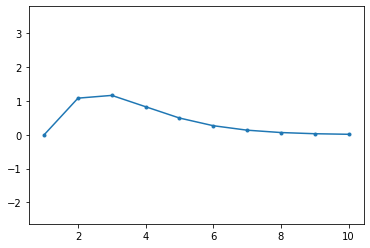

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.axes().set_aspect('equal', 'datalim')
n = 10
N = np.arange(1, n+1)
x = (N ** 3) * np.exp(-N) * np.sin(np.pi/N)
plt.plot(N, x, marker=".")
plt.show

In [ ]:
y = np.array([len(N), max(x), np.where(x == min(x))[0].tolist()[0]])
print(y)

[10.          1.16415538  0.        ]


In [ ]:
a = np.random.normal(loc = 1, scale = np.sqrt(100), size  = 5)
b = 2 * np.random.rand(5) - 1
X = np.matrix([a, b])
print(X)

[[14.11425088 12.80022746 -4.40471495  3.59558192 19.10768078]
 [ 0.47677663  0.20531775 -0.28449202  0.20393708  0.43916679]]


In [3]:
import requests
import json
endpoint = 'https://api.github.com/graphql'
token = ''

def post(query):
    headers = {"Authorization": "bearer " + token}
    res = requests.post(endpoint, json=query, headers=headers)
    if res.status_code != 200:
      raise Exception("failed : {}".format(res.status_code))
    return res.json()

In [4]:
# query
query0 = { 'query' : """
  query {
    search(query: "language:python stars:>=1000 sort:stars", type: REPOSITORY, first: 10) {
      edges {
        node {
          ... on Repository {
            nameWithOwner
            url
            createdAt
            description
            stargazers{
              totalCount
            }
          }
        }
      }
    }
  }
  """
}

query = { 'query' : """
  query userInfo($username: String!) {
    user(login: $username) {
      createdAt
      contributionsCollection {
        totalCommitContributions
        restrictedContributionsCount
      }
      organizations(first: 1) {
        totalCount
      }
      followers(first: 1) {
        totalCount
      }
    }
  }
  """
  , 'variables' : {'username' : 'wolfram1293'}
}

# post
res = post(query)
#print('{}'.format(json.dumps(res)))
print(res['data']['user']['organizations']['totalCount'])

4


In [16]:
with open('test2.txt', mode='r') as f:
    y21 = list(map(float, f.read().split(',')))

with open('test2vm.txt', mode='r') as f:
    y22 = list(map(float, f.read().split(',')))

<Figure size 432x288 with 0 Axes>

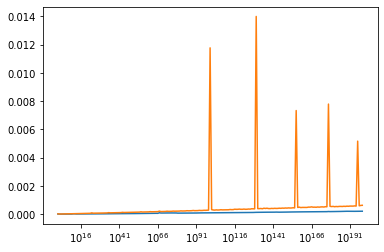

In [17]:
import matplotlib.pyplot as plt
x = [10**i for i in range(1, 200)]
plt.figure()
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x, y21)
ax.plot(x, y22)
plt.show()

In [5]:
with open('test1.txt', mode='r') as f:
    y21 = list(map(float, f.read().split(',')))

with open('test1vm.txt', mode='r') as f:
    y22 = list(map(float, f.read().split(',')))

<Figure size 432x288 with 0 Axes>

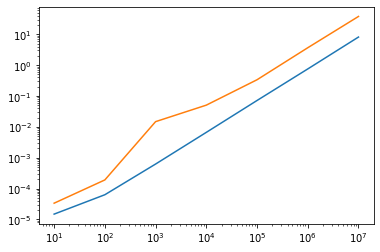

In [7]:
import matplotlib.pyplot as plt
x = [10**i for i in range(1, 8)]
plt.figure()
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y21)
ax.plot(x, y22)
plt.show()